In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Extract and export butterfly root for simulations

In [2]:
wing = 'forewing'
rootfile = f'Morpho_{wing}_procCoor.txt' 
rootdata =  pd.read_csv(rootfile, sep="\t", index_col=False)
np.where(rootdata.species=='hercules')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),)

In [3]:
# pick one wing arbitrarily 
selected = rootdata.iloc[0,:]
selected.loc['ProcCoord1'::] = selected.loc['ProcCoord1'::]*5
species = selected.species
print(species)
root = np.array(selected.iloc[8::])

hercules


/var/folders/ry/51znrq2s2px_52ndfy4k3kw00000gn/T/ipykernel_29737/1635261386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected.loc['ProcCoord1'::] = selected.loc['ProcCoord1'::]*5


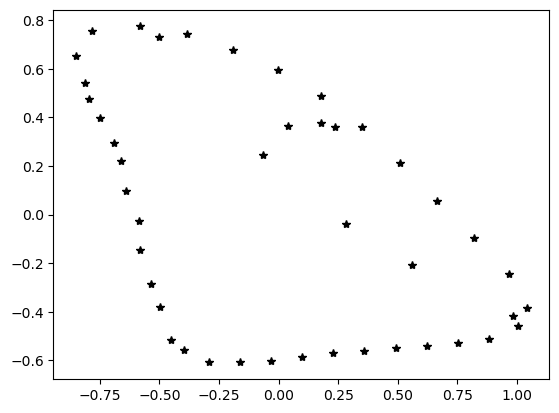

In [4]:
plt.plot(root[::2], root[1::2], '*', color='black')


In [5]:
#np.savetxt(f"{selected.species}_{wing}.csv", root, delimiter=",")

# Select fewer landmarks by hand 

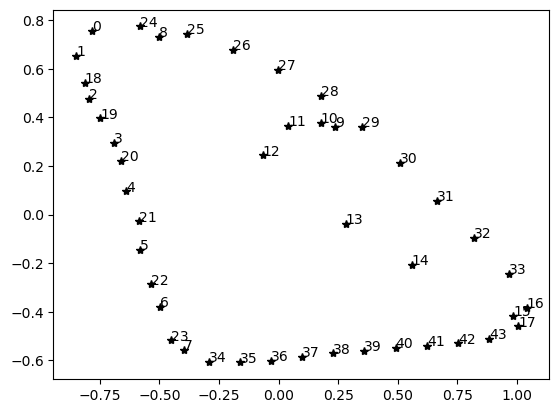

In [6]:
plt.plot(root[::2], root[1::2], '*', color='black')
n = list(range(len(root[::2])))
for i, txt in enumerate(n):
    plt.annotate(txt, (root[::2][i], root[1::2][i]))

In [7]:
landmark_sele =[0, 1, 19, 20, 21, 22, 23, 34, 36, 38, 40, 42, 17, 19, 16, 33, 31, 29, 27, 25, 24, 0]
xcoord = root[::2]
ycoord = root[1::2]
len(xcoord[landmark_sele])

22

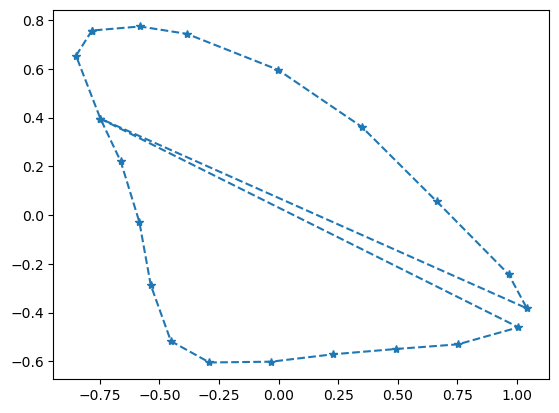

In [8]:
plt.plot(xcoord[landmark_sele], ycoord[landmark_sele], '--*')

In [9]:
xcoord_sele = xcoord[landmark_sele]
ycoord_sele = ycoord[landmark_sele]

In [10]:
len(xcoord_sele)

22

In [11]:
final_selected = np.array(list(zip(xcoord_sele, ycoord_sele))).flatten()
final_selected_rotated = np.array(list(zip(ycoord_sele, xcoord_sele))).flatten()

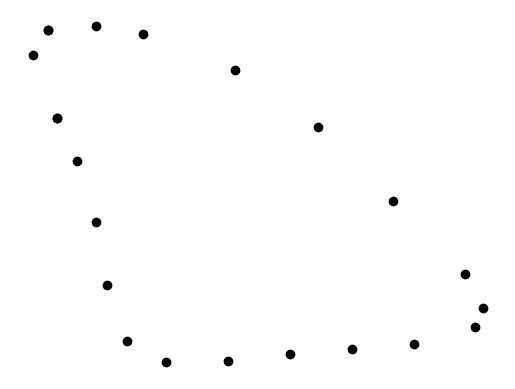

In [15]:
plt.plot(final_selected[::2], final_selected[1::2], 'o', color='black')
plt.axis('off')
plt.savefig(f"{species}_{wing}_landmarks.pdf")

In [ ]:
plt.plot(final_selected_rotated[::2], final_selected_rotated[1::2], '*')

In [12]:
np.savetxt(f"{selected.species}_{wing}_n={len(xcoord_sele)}.csv", final_selected, delimiter=",")
#np.savetxt(f"{selected.species}_{wing}_n={len(xcoord_sele)}_rotated.csv", final_selected_rotated, delimiter=",")

# rotate hercules n=20

In [ ]:
hercules = np.genfromtxt('hercules_forewing_n=20.csv', delimiter=',')
print(hercules)
rotated = np.array(list(zip(hercules[1::2], hercules[::2]))).flatten()
print(rotated)
np.savetxt('hercules_forewing_n=20_rotated.csv',rotated, delimiter=',')

# Reshuffle landmarks for nice plotting

In [ ]:
landmark_sele = [0, 1, 19, 20, 21, 22, 23, 34, 36, 38, 40, 42, 17, 16, 33, 31, 29, 27, 25, 24]
xcoord = root[::2]
ycoord = root[1::2]
len(xcoord[landmark_sele])

In [ ]:
plt.plot(xcoord[landmark_sele], ycoord[landmark_sele], '--*')

In [ ]:
xcoord_sele = xcoord[landmark_sele]
ycoord_sele = ycoord[landmark_sele]
final_selected = np.array(list(zip(xcoord_sele, ycoord_sele))).flatten()

In [ ]:
#np.savetxt(f"{selected.species}_{wing}_n={len(xcoord_sele)}.csv", final_selected, delimiter=",")

# rotate data set for test of bug 

In [ ]:
leaves = np.genfromtxt('../BM4/rotated_simdata/33603009535609402/leaves.csv', delimiter=',')

print(leaves)

In [ ]:
rotated = []
for leaf in leaves:
    rotated_leaf = np.array(list(zip(leaf[1::2], leaf[::2]))).flatten()
    rotated.append(rotated_leaf)
    

In [ ]:
np.savetxt('../BM4/rotated_simdata/33603009535609402/leaves.csv',rotated, delimiter=',')

# Look at difference when noise added

In [ ]:
leaves_noise = np.genfromtxt('../BM4/simdata/1925354381858041/leaves.csv', delimiter=',')
leaves = np.genfromtxt('../BM4/simdata/1925354381858041/leaves_no_noise.csv', delimiter=',')


In [ ]:
plt.plot(leaves[0][::2], leaves[0][1::2], 'o')
plt.plot(leaves_noise[0][::2], leaves_noise[0][1::2], 'o')